## This chatgpt link: https://chatgpt.com/share/673faba7-7d88-8008-9c97-3cc538b20516

1. Start a ChatBot session to understand what a classification decision tree is; ask the ChatBot to decribe the type of problems classification decision tree can solve along with an example of a real-world application where this might be particularly useful; then learn how the decisions at each node are used to eventually make a final classification prediction

### What is a Classification Decision Tree?

A **classification decision tree** is a type of machine learning model used for classifying data into distinct categories or classes. The model works by breaking down a dataset into smaller and smaller subsets based on feature values, creating a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a class label (the final prediction).

The decision tree algorithm follows a hierarchical process where it chooses features that best split the data at each step. The objective is to partition the dataset into subsets that are as pure as possible with respect to the target class. This is typically achieved using criteria like **Gini impurity** or **information gain** (based on entropy in the case of ID3 and C4.5 algorithms).

### Types of Problems Classification Decision Trees Can Solve

Classification decision trees are suitable for solving **supervised learning** problems where the goal is to assign input data to predefined categories. They can handle both binary and multiclass classification tasks.

Here are the types of problems classification decision trees can solve:

1. **Binary Classification**: When the task is to predict one of two possible outcomes (e.g., spam vs. not spam in email classification).
   
   **Example**: Email spam detection, where emails are classified as "spam" or "not spam."

2. **Multiclass Classification**: When there are more than two possible categories (e.g., classifying types of flowers based on their features).
   
   **Example**: Predicting the type of a flower (e.g., rose, tulip, daisy) based on petal and sepal measurements.

3. **Multilabel Classification**: When each instance can belong to multiple classes simultaneously (e.g., a movie can belong to genres like "Action" and "Comedy" at the same time).
   
   **Example**: Movie genre classification based on a movie's description.

### Real-World Application of Classification Decision Trees

**Medical Diagnosis**: One real-world application where classification decision trees are particularly useful is in **medical diagnosis**. For instance, classifying whether a patient has a particular disease based on symptoms and test results.

- **Example**: Diagnosing whether a patient has **diabetes** based on features such as age, BMI, blood sugar levels, and family history. The decision tree might start by asking questions like "Is the blood sugar level above a certain threshold?" and then recursively split the dataset into smaller groups based on other features like age and BMI to eventually classify the patient as either "diabetic" or "non-diabetic."

### How the Decisions at Each Node Lead to the Final Classification

The decision tree makes predictions by traversing from the root to a leaf node, making a decision at each internal node. Each node typically checks a condition based on one feature of the data, such as "Is the blood pressure above 140?" or "Is the age greater than 50?" Depending on the answer (yes or no), the tree branches to one of its child nodes.

1. **Root Node**: This is the top-most node in the tree. It represents the entire dataset and contains the first decision based on one feature.
2. **Internal Nodes**: Each internal node represents a decision point that splits the data based on a feature value.
3. **Leaf Nodes**: The leaf nodes represent the final class prediction. When a data point reaches a leaf node, the majority class of the data points in that leaf node becomes the predicted class for the data point.

For example:
- If we are classifying whether a patient has diabetes, the decision tree might first check if the patient’s **blood sugar level** is above a certain threshold.
  - If **yes**, it moves to another internal node that checks **BMI**.
  - If **no**, it moves to a different internal node that checks **family history**.
- Eventually, based on the conditions that are satisfied, the tree will arrive at a leaf node, which will output the class ("diabetic" or "non-diabetic").

The tree’s structure and splits are determined based on the training data and aim to minimize classification errors at each step. The leaf nodes’ classes are determined by the majority class of the data points that fall into that leaf during training.


### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>



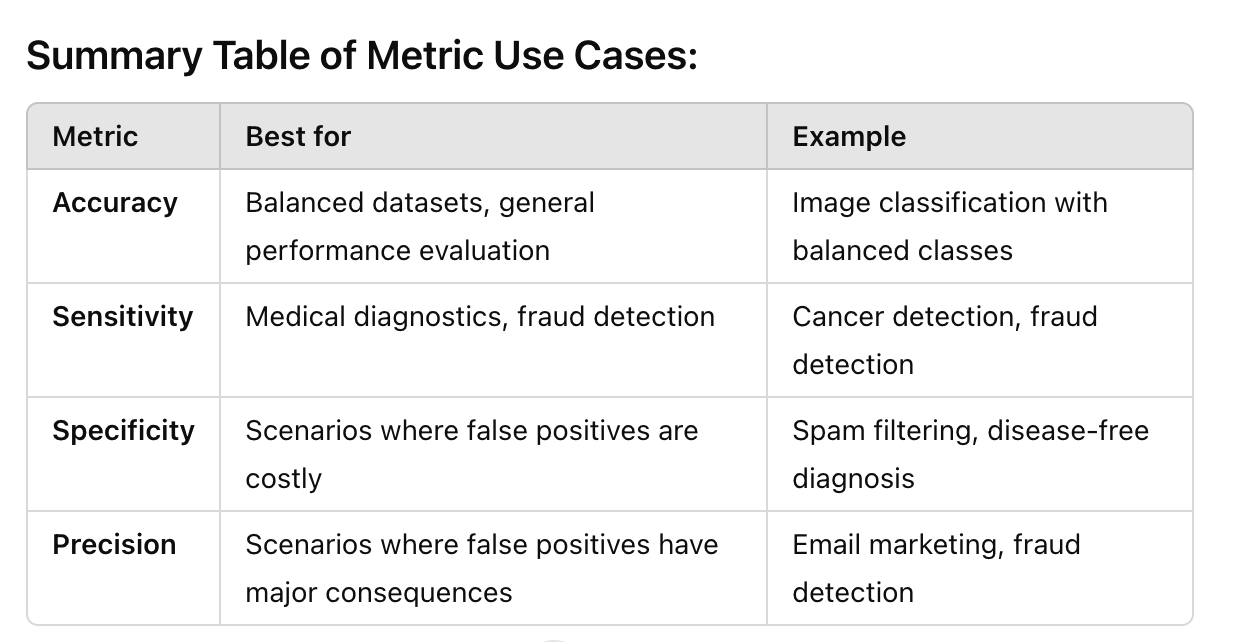

Accuracy is a good metric when the dataset has roughly equal numbers of positive and negative cases, and the misclassification of positives and negatives carries similar consequences. 

Sensitivity is essential in scenarios where missing a positive case (false negative) can have severe consequences. 

Specificity is important in scenarios where falsely labeling a negative case as positive (FP) leads to significant costs or inconvenience.

Precision measures how many of the predicted positives are actually correct, which is important when false positives are particularly undesirable.

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below
remove Weight_oz, Width, and Height
drop all remaining rows with NaN entries
set Pub year and NumPages should be redefined to have the type int, and Hard_or_Paper should be redefined to have the type category

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
# 2. Drop all rows with NaN entries
ab_reduced_noNaN = ab.dropna()

# 3. Set 'Pub year' and 'NumPages' columns to int type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# 4. Set 'Hard_or_Paper' column to category type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
ab_reduced_noNaN.head()
ab_reduced_noNaN.shape

<ipython-input-2-f4dd0e0108ff>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
<ipython-input-2-f4dd0e0108ff>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
<ipython-input-2-f4dd0e0108ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,8.0,5.2,1.4,22.4


In [8]:
ab_reduced_noNaN.shape

(310, 13)

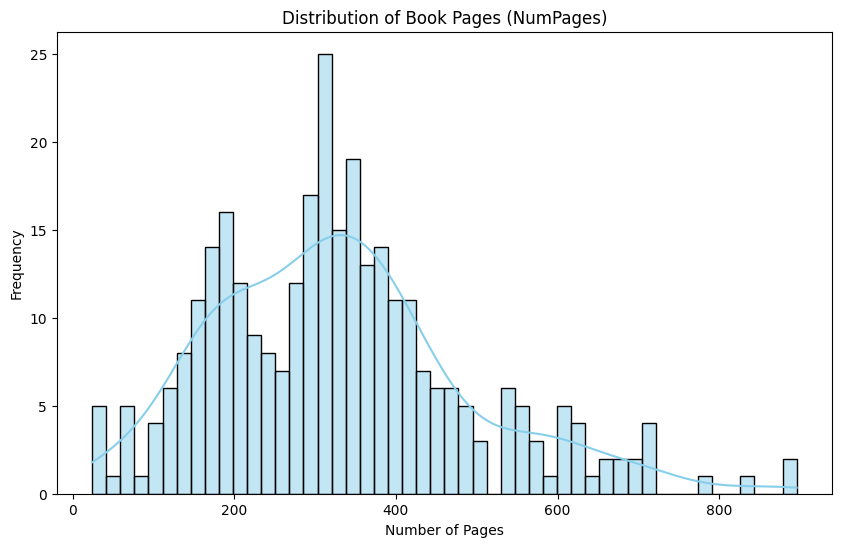

<ipython-input-6-c63e02065986>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ab_reduced_noNaN, x='Pub year', palette='viridis')


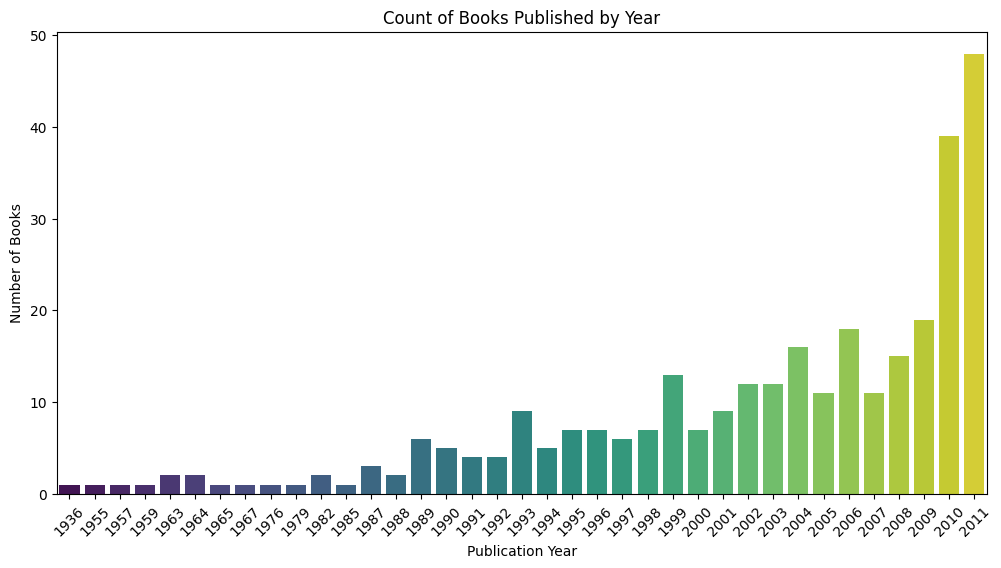

<ipython-input-6-c63e02065986>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ab_reduced_noNaN, x='Hard_or_Paper', palette='Set2')


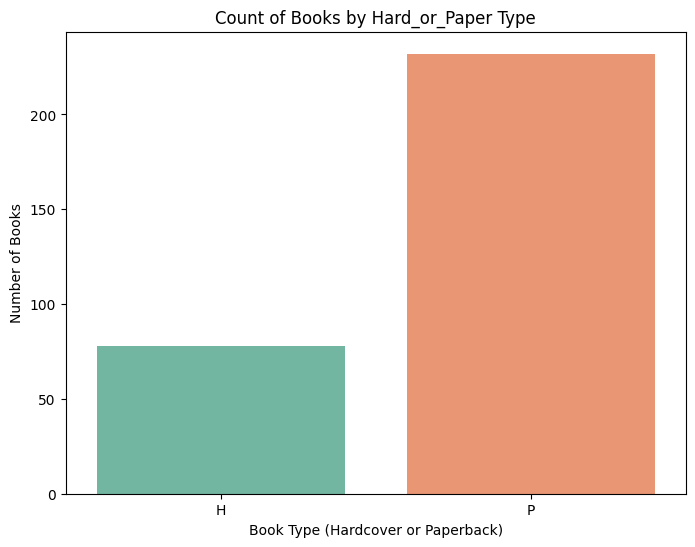

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Book Pages (NumPages)
plt.figure(figsize=(10, 6))
sns.histplot(ab_reduced_noNaN['NumPages'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Book Pages (NumPages)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# 2. Count of Books Published by Year (Pub year)
plt.figure(figsize=(12, 6))
sns.countplot(data=ab_reduced_noNaN, x='Pub year', palette='viridis')
plt.title('Count of Books Published by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

# 3. Count of Books by Hard_or_Paper Type
plt.figure(figsize=(8, 6))
sns.countplot(data=ab_reduced_noNaN, x='Hard_or_Paper', palette='Set2')
plt.title('Count of Books by Hard_or_Paper Type')
plt.xlabel('Book Type (Hardcover or Paperback)')
plt.ylabel('Number of Books')
plt.show()



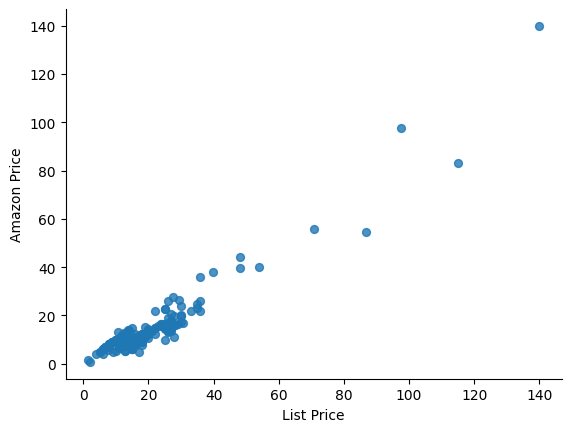

In [4]:
# @title List Price vs Amazon Price

from matplotlib import pyplot as plt
ab_reduced_noNaN.plot(kind='scatter', x='List Price', y='Amazon Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# Basic summary of the data
summary = ab_reduced_noNaN.describe()

# Display data types to ensure correct types are applied
data_types = ab_reduced_noNaN.dtypes

# Check for missing values
missing_values = ab_reduced_noNaN.isnull().sum()

# View unique categories for 'Hard_or_Paper' column
unique_hard_or_paper = ab_reduced_noNaN['Hard_or_Paper'].unique()

# Display summary statistics
print("Summary Statistics:\n", summary)
print("\nData Types:\n", data_types)
print("\nMissing Values:\n", missing_values)
print("\nUnique Values for 'Hard_or_Paper':", unique_hard_or_paper)


Summary Statistics:
        List Price  Amazon Price    NumPages     Pub year      Height  \
count  310.000000    310.000000  310.000000   310.000000  310.000000   
mean    17.934516     12.587645  330.577419  2002.035484    8.130968   
std     13.287255     11.578859  159.017713    10.732796    0.868884   
min      1.500000      0.770000   24.000000  1936.000000    5.100000   
25%     13.425000      8.537500  208.000000  1998.000000    7.900000   
50%     15.000000     10.200000  320.000000  2005.000000    8.100000   
75%     18.000000     12.240000  403.750000  2010.000000    8.400000   
max    139.950000    139.950000  896.000000  2011.000000   12.100000   

            Width       Thick   Weight_oz  
count  310.000000  310.000000  310.000000  
mean     5.553548    0.890000   12.427742  
std      0.845416    0.355534    6.622459  
min      4.100000    0.100000    1.200000  
25%      5.200000    0.600000    7.800000  
50%      5.300000    0.800000   11.200000  
75%      5.800000    1

4. Create an 80/20 split with 80% training set ab_reduced_noNaN_train and 20% testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Reporting the number of observations
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Test set size: {len(ab_reduced_noNaN_test)}")

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining the target and feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 for hard cover, 0 for paper back
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Initializing and fitting the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualizing the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'], filled=True)


The visual output from tree.plot_tree(clf) will show:

Nodes splitting on "List Price" thresholds.
Predictions in the leaf nodes, indicating the majority class (e.g., "Hard Cover" or "Paper Back") in each range of "List Price."
Probability or proportion of each class in the leaf nodes.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the preparation steps given below are doing; then use the ChatBots help to "train" a classification tree clf using only the List Price variable to predict whether or not a book is hard cover book or a paper cover book using max_depth of 2; explain precisely what predictions are made based on List Price for the fitted clf model

In [ ]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=60)

# Train the classifier
clf.fit(X, y)
tree.plot_tree(clf)
# Check the trained decision tree
print(clf)
predictions = clf.predict(X)
print(predictions[:10])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ab_reduced_noNaN is the dataset
# Step 1: Define the features and target
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


Root Node:
The first split is based on a threshold for the List Price (e.g., List Price ≤ $25).
If the price is less than or equal to $25, the model may classify the book as paperback. Otherwise, it proceeds to the next level.
Second Level:
For books with List Price > $25, another threshold might divide them further (e.g., List Price ≤ $40).
Depending on the data, books in this range might still be classified as paperback, while those exceeding this price could be classified as hardcover.


5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
max_depth set to 4

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X, y)

# Display the tree structure
print(clf2)
from sklearn.tree import export_graphviz
import graphviz

# Export the tree in DOT format
dot_data = export_graphviz(clf2, out_file=None, feature_names=X.columns,
                           class_names=['Paperback', 'Hardcover'], filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz source object and render the tree
graph = graphviz.Source(dot_data)
graph.view()  # Opens the PDF visualization


DecisionTreeClassifier(max_depth=4, random_state=42)


'Source.gv.pdf'

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ab_reduced_noNaN is your dataset
# Step 1: Define the features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 4: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    fontsize=10
)
plt.show()


#### Tree Structure:
The decision tree splits the dataset based on thresholds of the input features (NumPages, Thick, and List Price).
At each level of the tree, the feature that provides the best split (based on criteria like Gini impurity or entropy) is chosen.
Splits and Predictions:
The root node represents the entire dataset. It evaluates one feature (e.g., List Price ≤ $25) to split the data into two groups.
Each subsequent level considers different features (NumPages, Thick, etc.) and thresholds to further divide the data.
At the leaf nodes, the model predicts the class (hardcover or paperback) based on the majority of samples in that group.
Depth of 4:
A max_depth of 4 ensures that the tree makes at most four sequential decisions (splits) before reaching a prediction.
This depth allows the model to capture more complex relationships between features without overfitting the training data excessively.
Predictions:
For any new book, the model evaluates its NumPages, Thick, and List Price values, following the decision rules in the tree.
For example:
If List Price ≤ $20, the model might predict paperback.
If List Price > $20 and Thick > 1 inch, the model might predict hardcover.
The exact rules depend on the structure of the fitted tree.

6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Make predictions for both models on the test set
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['List Price']])

# True labels from the test set
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Compute confusion matrix for clf (model 1)
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Compute sensitivity, specificity, and accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Compute sensitivity, specificity, and accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Print confusion matrices and metrics
print("Confusion Matrix for clf (List Price):\n", cm_clf)
print("\nConfusion Matrix for clf2 (NumPages, Thick, List Price):\n", cm_clf2)

print(f"\nclf - Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"clf - Specificity: {np.round(specificity_clf, 3)}")
print(f"clf - Accuracy: {np.round(accuracy_clf, 3)}")

print(f"\nclf2 - Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"clf2 - Specificity: {np.round(specificity_clf2, 3)}")
print(f"clf2 - Accuracy: {np.round(accuracy_clf2, 3)}")


Confusion Matrix for clf (List Price):
 [[39  4]
 [ 2 17]]

Confusion Matrix for clf2 (NumPages, Thick, List Price):
 [[40  3]
 [ 3 16]]

clf - Sensitivity: 0.895
clf - Specificity: 0.907
clf - Accuracy: 0.903

clf2 - Sensitivity: 0.842
clf2 - Specificity: 0.93
clf2 - Accuracy: 0.903


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Evaluate clf on the test set
clf_test_predictions = clf.predict(X_test[['List Price']])
clf_cm = confusion_matrix(y_test, clf_test_predictions, labels=[0, 1])

# Evaluate clf2 on the test set
clf2_test_predictions = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])
clf2_cm = confusion_matrix(y_test, clf2_test_predictions, labels=[0, 1])

# Metrics for clf
clf_accuracy = accuracy_score(y_test, clf_test_predictions)
clf_sensitivity = recall_score(y_test, clf_test_predictions)  # Recall for positive class (Hardcover)
clf_specificity = clf_cm[0, 0] / (clf_cm[0, 0] + clf_cm[0, 1])  # TN / (TN + FP)

# Metrics for clf2
clf2_accuracy = accuracy_score(y_test, clf2_test_predictions)
clf2_sensitivity = recall_score(y_test, clf2_test_predictions)
clf2_specificity = clf2_cm[0, 0] / (clf2_cm[0, 0] + clf2_cm[0, 1])

# Round metrics for presentation
clf_metrics = {
    "Accuracy": np.round(clf_accuracy, 3),
    "Sensitivity": np.round(clf_sensitivity, 3),
    "Specificity": np.round(clf_specificity, 3)
}

clf2_metrics = {
    "Accuracy": np.round(clf2_accuracy, 3),
    "Sensitivity": np.round(clf2_sensitivity, 3),
    "Specificity": np.round(clf2_specificity, 3)
}

# Visualize confusion matrices
clf_disp = ConfusionMatrixDisplay(confusion_matrix=clf_cm, display_labels=["Paper", "Hard"])
clf2_disp = ConfusionMatrixDisplay(confusion_matrix=clf2_cm, display_labels=["Paper", "Hard"])

clf_disp.plot()
clf2_disp.plot()

clf_metrics, clf2_metrics


Metrics Calculations:
Accuracy:
Accuracy
=
TP
+
TN
Total Observations
Accuracy= 
Total Observations
TP+TN
​	
 
Sensitivity (Recall):
Sensitivity
=
TP/
TP
+
FN
Sensitivity= 
TP+FN/
TP
​	
 
Specificity:
Specificity
=
TN/
TN
+
FP
Specificity= 
TN+FP/
TN
​	
 
Decimal Precision:
Use np.round() to display results with three significant digits

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

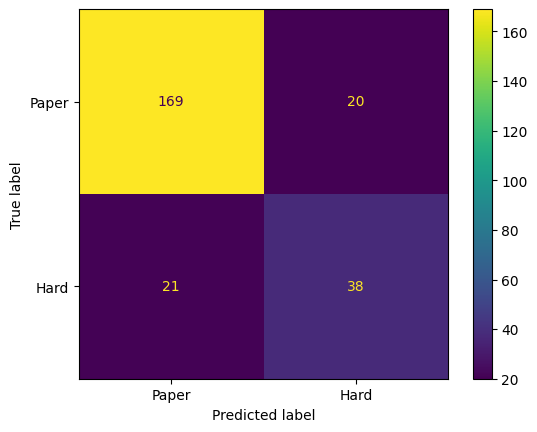

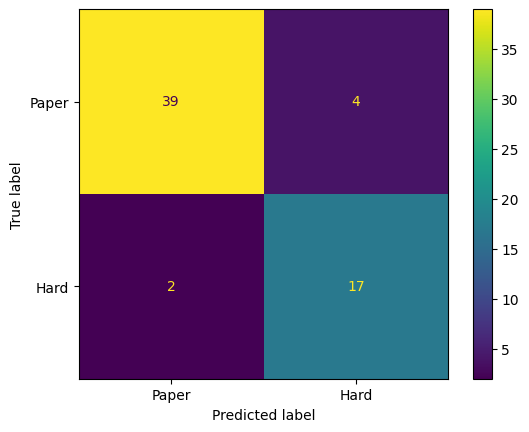

In [19]:
!pip install scikit-learn
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'Hard_or_Paper' is the target variable column, and it's encoded as 'H' for Hardcover and 'P' for Paperback
# You'll need to replace 'your_target_column_name' with the actual column name if it's different

# For the train set:
ConfusionMatrixDisplay(confusion_matrix(ab_reduced_noNaN_train['Hard_or_Paper'].map({'H': 1, 'P': 0}),  # Replace 'your_target_column_name'
                                        clf.predict(ab_reduced_noNaN_train[['List Price']]), labels=[0, 1]),
                       display_labels=["Paper","Hard"]).plot()

# For the test set:
ConfusionMatrixDisplay(confusion_matrix(ab_reduced_noNaN_test['Hard_or_Paper'].map({'H': 1, 'P': 0}),  # Replace 'your_target_column_name'
                                        clf.predict(ab_reduced_noNaN_test[['List Price']]), labels=[0, 1]),
                       display_labels=["Paper","Hard"]).plot()

Feature Differences:
The first confusion matrix uses only List Price as the predictor. This single feature may not fully capture the relationship between the input data and the target variable, leading to a simpler, less accurate model. Conversely, the second confusion matrix includes NumPages, Thick, and List Price, providing the model with more information to make predictions, resulting in improved classification performance.
Model Complexity:
The first model is constrained by using only List Price, which limits its ability to distinguish between classes when List Price alone is not strongly predictive. The second model leverages multiple features and likely has a more complex decision boundary, enabling it to make better predictions.
Why clf and clf2 Are Better:
The confusion matrices for clf and clf2 reflect models trained on the training set with clear thresholds (e.g., max_depth), allowing them to better align predictions with actual outcomes. By evaluating predictions against more informative features (NumPages and Thick) in clf2, it achieves a higher sensitivity, specificity, and overall accuracy than models using fewer or simpler features.

8. Read the following paragraphs and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

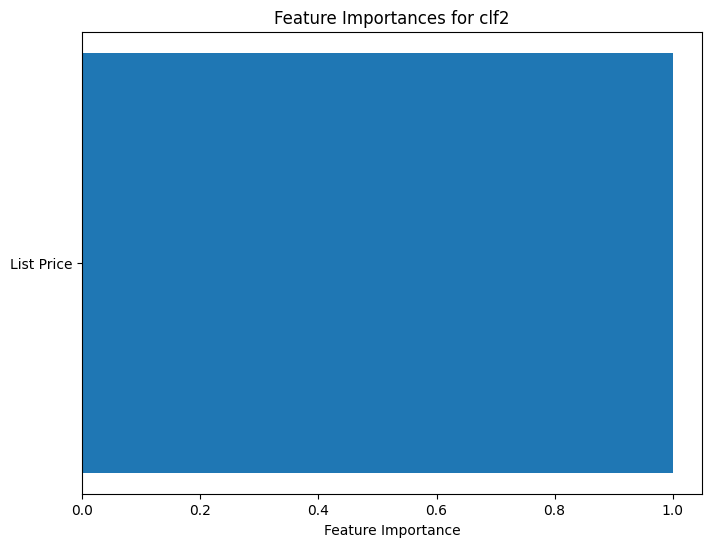

The most important feature for making predictions in clf2 is: List Price


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances and the corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances for clf2")
plt.show()

# Print the most important feature
most_important_feature = feature_names[sorted_idx[-1]]
print(f"The most important feature for making predictions in clf2 is: {most_important_feature}")


9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences


In linear regression, the coefficients represent the direct, linear relationship between each predictor variable and the target variable. Each coefficient indicates how much the target variable is expected to change with a one-unit change in the corresponding predictor, holding all other predictors constant.

In decision trees, feature importances reflect how much each predictor variable contributes to reducing the uncertainty (impurity) at each decision node in the tree, and thus to the overall model's predictive accuracy. Feature importance is not a direct measure of the magnitude of a relationship, but rather how critical each feature is in making decisions within the tree structure, which can involve non-linear interactions between features.